**Maya:**
BCC-CSM2-MR
BCC-ESM1
CAMS-CSM1-0
CanESM5
CNRM-CM6-1 (f2)
CNRM-CM6-1-HR
CNRM-ESM2-1 (f2)
E3SM-1-1
EC-Earth3
EC-Earth3-Veg
FIO-ESM-2-0
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR

**Lana:**
MIROC6
HadGEM3-GC31-LL (f3)
HadGEM3-GC31-MM (f3)
UKESM1-0-LL (f2)
MPI-ESM1-2-HR
MRI-ESM2-0
GISS-E2-1-G
CESM2
CESM2-WACCM
NorESM2-LM
GFDL-CM4
NESM3
SAM0-UNICON


## Utilities

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import matplotlib as mpl
import pandas as pd
import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy
import os
import glob
import xarray as xr


jtplot.style(context='paper', fscale=1.4, spines=True, grid=False, ticks=True,gridlines='--')

fontsize=16
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize']= 'x-large'
mpl.rcParams['figure.facecolor']='white'

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
hfont = {'fontname':'Arial'}

mpl.rcParams['text.latex.preamble']= r'\usepackage{amsmath}'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']) 

In [2]:
lat_max = 61
lat_min = 46
lon_max = 360-20
lon_min = 360-55

In [28]:
M20_models2 = ['BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'E3SM-1-1', 'EC-Earth3', 'EC-Earth3-Veg', 'FIO-ESM-2-0', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC6', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'UKESM1-0-LL', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'GISS-E2-1-G', 'CESM2', 'CESM2-WACCM', 'NorESM2-LM', 'GFDL-CM4', 'NESM3', 'SAM0-UNICON']

## Check data in /tmp

In [3]:
paths = [x[0] for x in os.walk('/p/tmp/mayayami/SYNDA/data/')]
data_paths = []
for path in paths:
    if glob.glob("{}/tos_Omon_*.nc".format(path)):
        data_paths.append(glob.glob("{}/tos_Omon_*.nc".format(path)))

In [4]:
print(data_paths[0][0])

/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r3i1p1f2/Omon/tos/gn/v20190125/tos_Omon_CNRM-CM6-1_historical_r3i1p1f2_gn_185001-201412.nc


In [5]:
ds = nc.Dataset(data_paths[0][0])

In [5]:
data_names = []
for path in data_paths:
    for file in path:
        data_names.append(file.split("/tos_Omon_", 1)[1])

In [6]:
print(len(data_names))

2976


# Latitude/Longitude keys

In [7]:
key_types = []
for path in data_paths:
    ds = nc.Dataset(path[0])
    key_types.append(ds.variables.keys())
key_types = np.unique(key_types)
#print(key_types)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


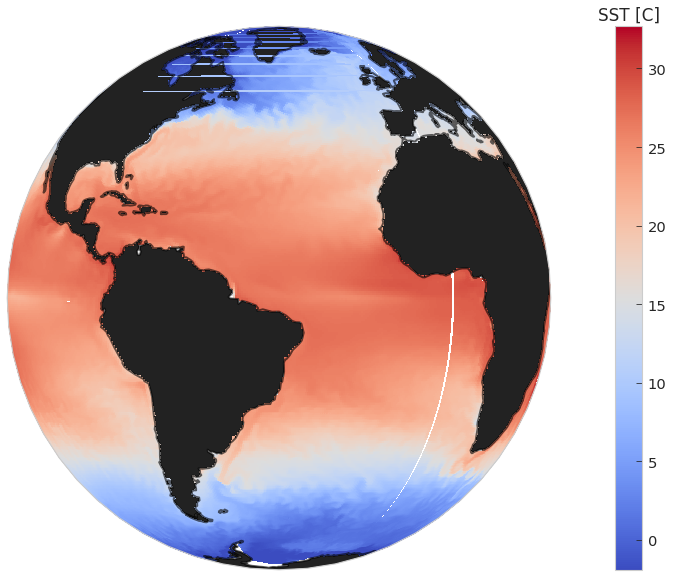

In [20]:
lat2 = ds['latitude'][:]
lon2 = ds['longitude'][:]
tos2 = ds['tos'][:]
time2 = ds['time'][:]
fig = plt.figure(figsize = (23,10))
# ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=320))
ax.set_global()
ax.coastlines(linewidth=2,alpha=0.6)
mesh = ax.pcolormesh(lon2,lat2,tos2[59],transform=ccrs.PlateCarree(),cmap='coolwarm')
cbar = fig.colorbar(mesh)
cbar.ax.set_title('SST [C]')
ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='k')

plt.show()

In [21]:
# all datasets contain at least one of the following keys:
# lat, latitude, nav_lat
for keys in key_types:
    if not ("lat" in keys or "latitude" in keys or "nav_lat" in keys):
        print(keys)
# lon, longitude, nav_lon
for keys in key_types:
    if not ("lon" in keys or "longitude" in keys or "nav_lon" in keys):
        print(keys)

# but then there is one dataset containing lat as well as latitude and lon as well as longitude
for keys in key_types:
    if ("lat" in keys and "latitude" in keys) or ("lat" in keys and "nav_lat" in keys) or ("latitude" in keys and "nav_lat" in keys):
        print(keys)
for keys in key_types:
    if ("lon" in keys and "longitude" in keys) or ("lon" in keys and "nav_lon" in keys) or ("longitude" in keys and "nav_lon" in keys):
        print(keys)


# these seem to be the three latitude/longitude keys
lat_keys = ['lat', 'latitude', 'nav_lat']
lon_keys = ['lon', 'longitude', 'nav_lon']

dict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'latitude', 'longitude', 'tos'])
dict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'latitude', 'longitude', 'tos'])


# Models with "latitude" and "longitude"

In [26]:
# models with "latitude" and "longitude"
str_lat = "latitude"
str_lon = "longitude"
paths = []
for path in data_paths:
    ds = nc.Dataset(path[0])
    if str_lat in ds.variables.keys() and not "lat" in ds.variables.keys():
        paths.append(path)

## Examine only first model's first member using xarray

/home/mayayami/.conda/envs/main/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


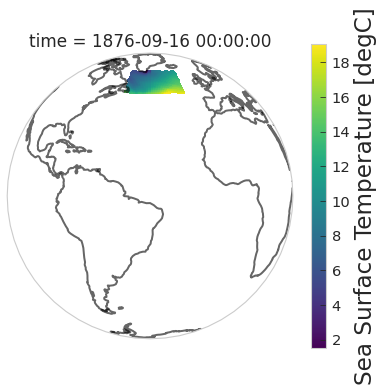

In [21]:
ds = xr.open_mfdataset(paths[0]).tos.isel(time = 320)

fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.Orthographic(central_longitude=320))
)
(ds
    .where(ds[str_lon] >= lon_min)
    .where(ds[str_lon] <= lon_max)
    .where(ds[str_lat] >= lat_min)
    .where(ds[str_lat] <= lat_max)
    .plot(
        x = str_lon, 
        y = str_lat,
        ax = axis,
        transform = ccrs.PlateCarree()
    )
)
axis.coastlines(linewidth=2,alpha=0.6)
fig.show()

/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


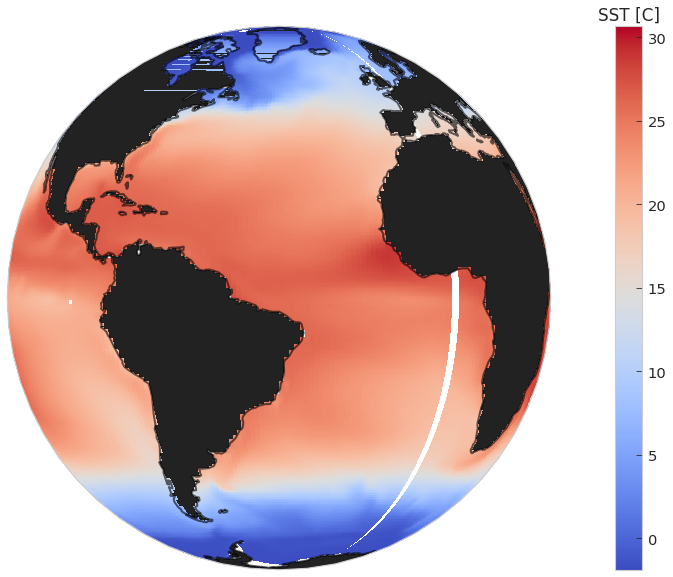

In [47]:
ds = nc.Dataset(paths[0][0])

lat2 = ds[str_lat][:]
lon2 = ds[str_lon][:]
tos2 = ds['tos'][:]
time2 = ds['time'][:]
fig = plt.figure(figsize = (23,10))
# ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=320))
ax.set_global()
ax.coastlines(linewidth=2,alpha=0.6)
mesh = ax.pcolormesh(lon2,lat2,tos2[59],transform=ccrs.PlateCarree(),cmap='coolwarm')
cbar = fig.colorbar(mesh)
cbar.ax.set_title('SST [C]')
ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='k')

plt.show()

# Model with nav_lat and nav_lon

In [49]:
# models with "nav_lat" and "nav_lon"
str_lat = "nav_lat"
str_lon = "nav_lon"

paths = []
for path in data_paths:
    ds = nc.Dataset(path[0])
    if str_lat in ds.variables.keys():
        paths.append(path)
        #print(path)

# it's the IPSL models that have these coordinates


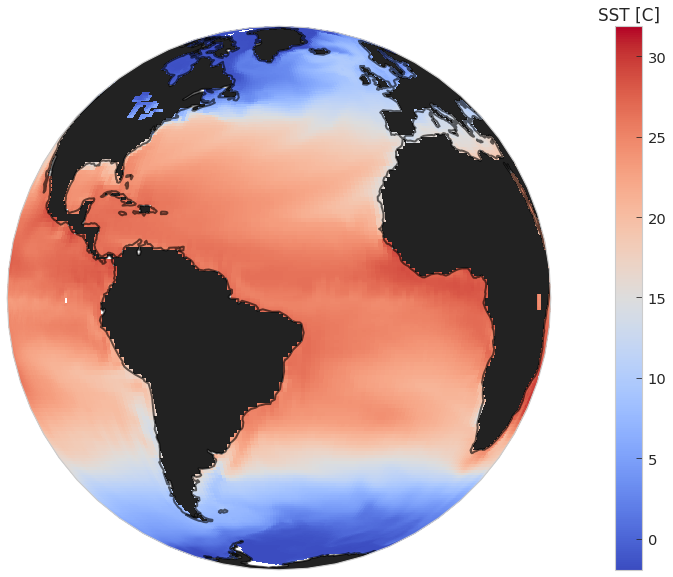

In [50]:
ds = nc.Dataset(paths[0][0])

lat2 = ds[str_lat][:]
lon2 = ds[str_lon][:]
tos2 = ds['tos'][:]
time2 = ds['time'][:]
fig = plt.figure(figsize = (23,10))
# ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=320))
ax.set_global()
ax.coastlines(linewidth=2,alpha=0.6)
mesh = ax.pcolormesh(lon2,lat2,tos2[59],transform=ccrs.PlateCarree(),cmap='coolwarm')
cbar = fig.colorbar(mesh)
cbar.ax.set_title('SST [C]')
ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='k')

plt.show()

## Have a look at the first model's first realization

In [55]:
# have a look at the first one
# tos at some random time
ds = xr.open_mfdataset(paths[0][0]).tos.isel(time=320)
ds

<xarray.DataArray 'tos' (y: 332, x: 362)>
dask.array<getitem, shape=(332, 362), dtype=float32, chunksize=(332, 362), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    time     datetime64[ns] 1876-09-16
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_temperature
    long_name:           Sea Surface Temperature
    units:               degC
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    cell_measures:       area: areacello
    description:         This may differ from "surface temperature" in region...
    history:             none

limit_output extension: Maximum message size of 10000 exceeded with 19828 characters

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


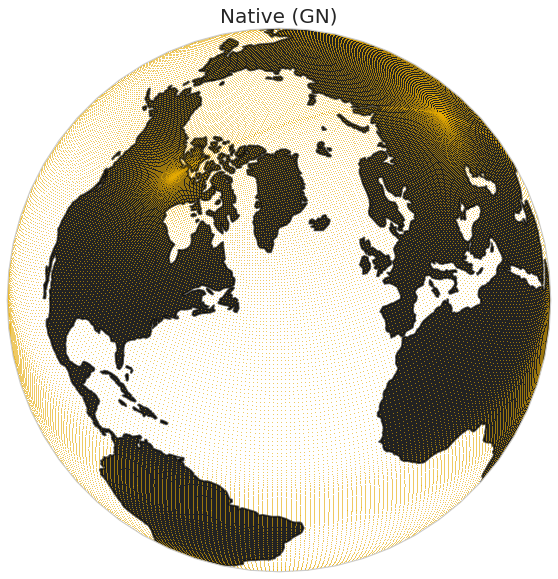

In [62]:
%matplotlib inline
fig = plt.figure(figsize = (23,10))
ax = fig.add_subplot(121, projection=ccrs.Orthographic(central_longitude=320,central_latitude=50))
ax.set_global()
ax.coastlines(linewidth=2,alpha=0.6)
ax.scatter(ds.nav_lon.values,ds.nav_lat.values,color='C5',transform=ccrs.PlateCarree(),s=0.5)
# cbar.ax.set_title('SST [C]')
ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='k')
ax.set_title('Native (GN)',fontsize=20)
plt.show()

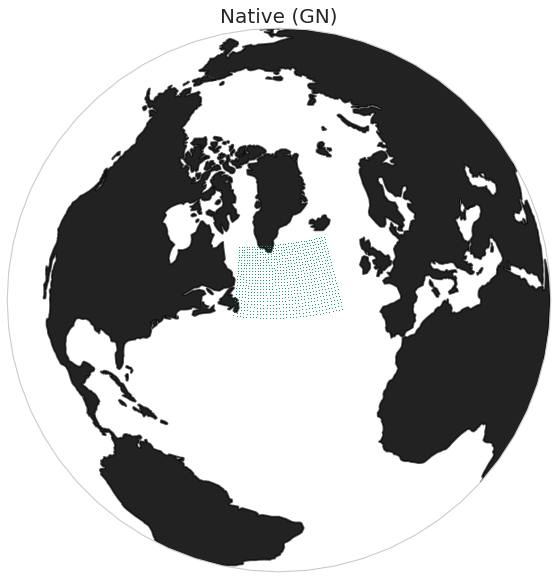

In [93]:
ds.nav_lat.isel(x=xidc,y=yidc).values
%matplotlib inline
fig = plt.figure(figsize = (23,10))
ax = fig.add_subplot(121, projection=ccrs.Orthographic(central_longitude=320,central_latitude=50))
ax.set_global()
ax.coastlines(linewidth=2,alpha=0.6)
ax.scatter(ds.nav_lon.isel(x=xidc,y=yidc).values,ds.nav_lat.isel(x=xidc,y=yidc).values,color='C0',transform=ccrs.PlateCarree(),s=0.5)
# cbar.ax.set_title('SST [C]')
ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='k')
ax.set_title('Native (GN)',fontsize=20)
plt.show()

In [115]:
def marea_indices2(lat,lon):
    lat_max = 61
    lat_min = 46
    if np.sum(lon<0)>0:
        lon_max = -20
        lon_min = -55
    else:
        lon_max = 360-20
        lon_min = 360-55
    lat_where = ((lat>=lat_min)&(lat<=lat_max))
    lon_where = ((lon>=lon_min)&(lon<=lon_max))
    coord_where = np.logical_and(lat_where,lon_where)
    idc = np.where(coord_where)    
    return coord_where

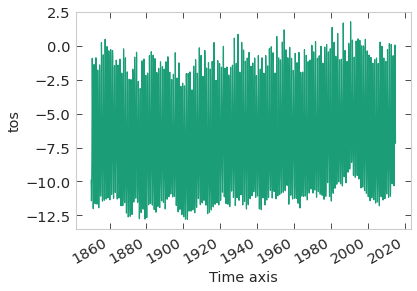

In [210]:
spg = (
    ds2
    .where(ds2.nav_lat >= 46)
    .where(ds2.nav_lat <= 61)
    .where(ds2.nav_lon >= -55)
    .where(ds2.nav_lon <= -20)
    .mean(dim=("x", "y"))
)
gl = ds2.mean(dim=("x", "y"))
spga = (spg - gl)
# spga = (spg - gl).groupby('time.year').mean()
spga.plot()

In [116]:
coord_where = marea_indices2(ds.nav_lat.values,ds.nav_lon.values)
# xidc = idc[1]
# yidc = idc[0]

In [108]:
ds2.y.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

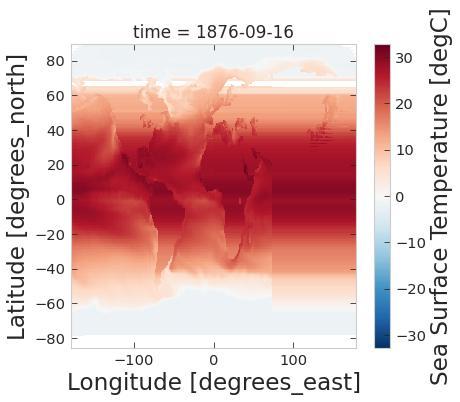

In [53]:
ds.plot(x = "nav_lon", y = "nav_lat")

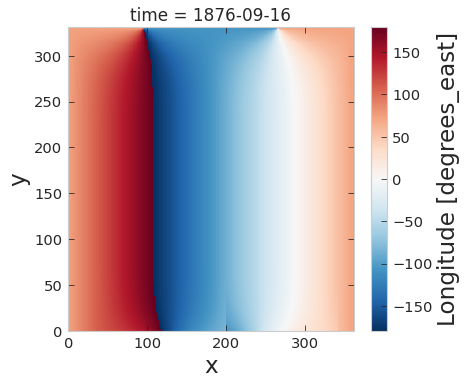

In [112]:
ds.nav_lon.plot()

In [388]:
lat_where = np.logical_and(ds.nav_lat.values >= lat_min, ds.nav_lat.values <= lat_max)
lon_where = np.logical_and(ds.nav_lon.values >= lon_min, ds.nav_lon.values <= lon_max)
coord_where = np.logical_and(lat_where, lon_where)
print(lon_where.any()) # that's weird or I am just confused

False


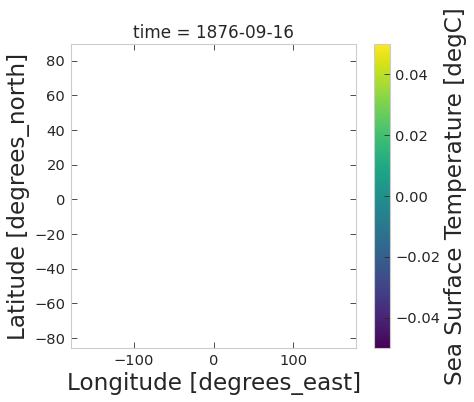

In [395]:
(ds
    .where(ds.nav_lat >= lat_min)
    .where(ds.nav_lat <= lat_max)
    .where(ds.nav_lon >= lon_min)
    .where(ds.nav_lon <= lon_max)
    .plot(x = 'nav_lon', y = 'nav_lat')
)

# Model with "lat" and "latitude" (and "lon" and "longitude")

In [74]:
# models with "lat" and "latitude"
paths = []
for path in data_paths:
    ds = nc.Dataset(path[0])
    keys = ds.variables.keys()
    if ("lat" in keys and "latitude" in keys) or ("lat" in keys and "nav_lat" in keys) or ("latitude" in keys and "nav_lat" in keys):
        paths.append(path)
        print(path)

['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/BCC/BCC-ESM1/historical/r2i1p1f1/Omon/tos/gn/v20181218/tos_Omon_BCC-ESM1_historical_r2i1p1f1_gn_185001-201412.nc']
['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/BCC/BCC-ESM1/historical/r1i1p1f1/Omon/tos/gn/v20181129/tos_Omon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc']
['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/BCC/BCC-ESM1/historical/r3i1p1f1/Omon/tos/gn/v20181218/tos_Omon_BCC-ESM1_historical_r3i1p1f1_gn_185001-201412.nc']
['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r2i1p1f1/Omon/tos/gn/v20181031/tos_Omon_BCC-CSM2-MR_historical_r2i1p1f1_gn_185001-201412.nc']
['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Omon/tos/gn/v20181126/tos_Omon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc']
['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r3i1p1f1/Omon/tos/gn/v20181102/tos_Omon_BCC-CSM2-MR_historical_r3i1p1f1_gn_185001-201412.nc']


# Create dataset

In [214]:
model_names = ['AWI-CM-1-1-MR', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'FGOALS-f3-L', 'FGOALS-g3', 'IITM-ESM', 'CanESM5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'E3SM-1-1', 'EC-Earth3', 'EC-Earth3-Veg', 'FIO-ESM-2-0', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC6', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'UKESM1-0-LL', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'GISS-E2-1-G', 'CESM2', 'CESM2-WACCM', 'NorESM1-F', 'NorESM2-LM', 'GFDL-AM4', 'GFDL-CM4', 'GFDL-ESM4', 'NESM3', 'SAM0-UNICON']

In [222]:
ens_names = ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1', 'r10i1p1f1']

In [215]:
len(model_names)

34

In [216]:
data = np.zeros((34,10,1980))

In [223]:
amoc6 = xr.DataArray(
    data,
    dims = ('models', 'ensemble_members', 'time'),
    coords = dict(
        models      = model_names,
        ensemble_members = ens_names,
        time        = dss.time
        )
    )

In [224]:
amoc6.sel(models=model_names[0]).sel(ensemble_members=ens_names[0])

<xarray.DataArray (time: 1980)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
    models            <U15 'AWI-CM-1-1-MR'
    ensemble_members  <U9 'r1i1p1f1'
  * time              (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-1...

limit_output extension: Maximum message size of 10000 exceeded with 12432 characters

In [225]:
amoc6.data[0,0,:]=spga

In [226]:
amoc6.to_netcdf('CMIP6_amoc_index.nc')